## DFO Si Plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import pickle
import cmocean
import glob

mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('legend', fontsize=12)
mpl.rc('axes', titlesize=12)
mpl.rc('axes', labelsize=12)
mpl.rc('figure', titlesize=12)
mpl.rc('font', size=12)
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble = ','.join(r'''
 \usepackage{txfonts}
 \usepackage{lmodern}
 '''.split()))
mpl.rc('font', family='sans-serif', weight='normal', style='normal')
%matplotlib inline

In [2]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    navlon=mesh.variables['nav_lon'][:,:]
    navlat=mesh.variables['nav_lat'][:,:]
    tmask=mesh.variables['tmask'][:,:,:,:]
    gdept=mesh.variables['gdept_1d'][0,:]
    e3t0=mesh.variables['e3t_0'][0,:,:,:]
bathy=np.sum(e3t0,0)
with nc.Dataset('/results/SalishSea/hindcast.201812/01jan16/SalishSea_1h_20160101_20160101_ptrc_T.nc') as ftemp:
        bounds=np.copy(ftemp.variables['deptht_bounds'][:,:])

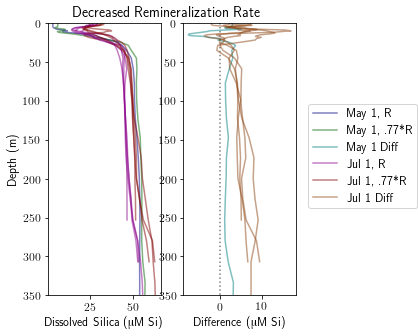

In [3]:
cdirBase='/data/eolson/results/MEOPAR/SS36runs/CedarRuns/'
cdir0='PAR_13bfastSi'
cdir1='PAR_13bfastSiLR'
fp0May=glob.glob(cdirBase+cdir0+'/SalishSea_1h_*_ptrc_T_20170501-20170510.nc')[0]
fp1May=glob.glob(cdirBase+cdir1+'/SalishSea_1h_*_ptrc_T_20170501-20170510.nc')[0]
fp0Jul=glob.glob(cdirBase+cdir0+'/SalishSea_1h_*_ptrc_T_*20170719.nc')[0]
fp1Jul=glob.glob(cdirBase+cdir1+'/SalishSea_1h_*_ptrc_T_*20170719.nc')[0]
fig,ax=plt.subplots(1,2,figsize=(6,5))
fig.subplots_adjust(right=.7)
ax[1].plot((0,0),(0,350),'k:',alpha=.5)
with nc.Dataset(fp0May) as f0May, nc.Dataset(fp1May) as f1May, nc.Dataset(fp0Jul) as f0Jul, nc.Dataset(fp1Jul) as f1Jul:
    for (j,i) in ((457,264),):#(423,275),(455,284),(456,264)):
        p0M,=ax[0].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f0May.variables['silicon'][0,:,j,i]),gdept,
                        '-',color='navy',alpha=.5,label='May 1, R')
        p1M,=ax[0].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f1May.variables['silicon'][0,:,j,i]),gdept,
                        '-',color='darkgreen',alpha=.5,label='May 1, .77*R')
        p2M,=ax[1].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f1May.variables['silicon'][0,:,j,i]-f0May.variables['silicon'][0,:,j,i]),
                        gdept,'-',color='teal',alpha=.5, label='May 1 Difference')
    for (j,i) in ((423,264),(423,275),(455,284),(456,264)):
        p0J,=ax[0].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f0Jul.variables['silicon'][-1,:,j,i]),gdept,
                        '-',color='darkmagenta',alpha=.5,label='Jul 27, R')
        p1J,=ax[0].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f1Jul.variables['silicon'][-1,:,j,i]),gdept,
                        '-',color='maroon',alpha=.5,label='Jul 27, .77*R')
        p2J,=ax[1].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f1Jul.variables['silicon'][-1,:,j,i]-f0Jul.variables['silicon'][-1,:,j,i]),
                        gdept,'-',color='saddlebrown',alpha=.5, label='Jul 27 Difference')
fig.legend((p0M,p1M,p2M,p0J,p1J,p2J),('May 1, R','May 1, .77*R','May 1 Diff','Jul 1, R','Jul 1, .77*R','Jul 1 Diff'),loc=5,
           bbox_to_anchor=(.98,0.5,0,0))
ax[0].set_ylim(350,0)
ax[1].set_ylim(350,0)
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel('Dissolved Silica ($\muup$M Si)')
ax[1].set_xlabel('Difference ($\muup$M Si)')
fig.text(.4,.9,'Decreased Remineralization Rate',ha='center',size=14)
fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsEval/DecreasedRemin.png',dpi=300,transparent=True)

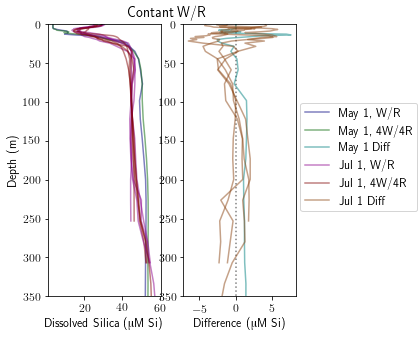

In [4]:
cdirBase='/data/eolson/results/MEOPAR/SS36runs/CedarRuns/'
cdir0='PAR_13bslowSi'
cdir1='PAR_13bfastSi'
fp0May=glob.glob(cdirBase+cdir0+'/SalishSea_1h_*_ptrc_T_20170501-20170510.nc')[0]
fp1May=glob.glob(cdirBase+cdir1+'/SalishSea_1h_*_ptrc_T_20170501-20170510.nc')[0]
fp0Jul=glob.glob(cdirBase+cdir0+'/SalishSea_1h_*_ptrc_T_*20170719.nc')[0]
fp1Jul=glob.glob(cdirBase+cdir1+'/SalishSea_1h_*_ptrc_T_*20170719.nc')[0]
fig,ax=plt.subplots(1,2,figsize=(6,5))
fig.subplots_adjust(right=.7)
ax[1].plot((0,0),(0,350),'k:',alpha=.5)
with nc.Dataset(fp0May) as f0May, nc.Dataset(fp1May) as f1May, nc.Dataset(fp0Jul) as f0Jul, nc.Dataset(fp1Jul) as f1Jul:
    for (j,i) in ((457,264),):#((423,264),(423,275),(455,284),(456,264)):
        p0M,=ax[0].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f0May.variables['silicon'][0,:,j,i]),gdept,
                        '-',color='navy',alpha=.5,label='May 1, R')
        p1M,=ax[0].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f1May.variables['silicon'][0,:,j,i]),gdept,
                        '-',color='darkgreen',alpha=.5,label='May 1, .77*R')
        p2M,=ax[1].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f1May.variables['silicon'][0,:,j,i]-f0May.variables['silicon'][0,:,j,i]),
                        gdept,'-',color='teal',alpha=.5, label='May 1 Difference')
    for (j,i) in ((423,264),(423,275),(455,284),(456,264)):
        p0J,=ax[0].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f0Jul.variables['silicon'][-1,:,j,i]),gdept,
                        '-',color='darkmagenta',alpha=.5,label='Jul 27, R')
        p1J,=ax[0].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f1Jul.variables['silicon'][-1,:,j,i]),gdept,
                        '-',color='maroon',alpha=.5,label='Jul 27, .77*R')
        p2J,=ax[1].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f1Jul.variables['silicon'][-1,:,j,i]-f0Jul.variables['silicon'][-1,:,j,i]),
                        gdept,'-',color='saddlebrown',alpha=.5, label='Jul 27 Difference')
fig.legend((p0M,p1M,p2M,p0J,p1J,p2J),('May 1, W/R','May 1, 4W/4R','May 1 Diff','Jul 1, W/R','Jul 1, 4W/4R','Jul 1 Diff'),loc=5,
           bbox_to_anchor=(.98,0.5,0,0))
ax[0].set_ylim(350,0)
ax[1].set_ylim(350,0)
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel('Dissolved Silica ($\muup$M Si)')
ax[1].set_xlabel('Difference ($\muup$M Si)')
fig.text(.4,.9,'Contant W/R',ha='center',size=14)
fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsEval/FastSlow.png',dpi=300,transparent=True)

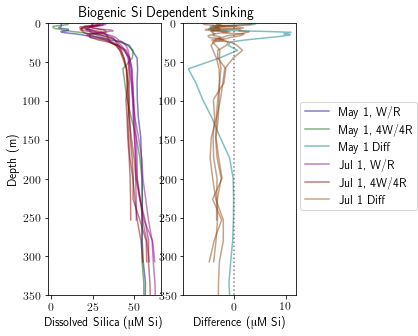

In [5]:
cdirBase='/data/eolson/results/MEOPAR/SS36runs/CedarRuns/'
cdir0='PAR_13bfastSiLR'
cdir1='PAR_BSIdepfastSiLR'
fp0May=glob.glob(cdirBase+cdir0+'/SalishSea_1h_*_ptrc_T_20170501-20170510.nc')[0]
fp1May=glob.glob(cdirBase+cdir1+'/SalishSea_1h_*_ptrc_T_20170501-20170510.nc')[0]
fp0Jul=glob.glob(cdirBase+cdir0+'/SalishSea_1h_*_ptrc_T_*20170719.nc')[0]
fp1Jul=glob.glob(cdirBase+cdir1+'/SalishSea_1h_*_ptrc_T_*20170719.nc')[0]
fig,ax=plt.subplots(1,2,figsize=(6,5))
fig.subplots_adjust(right=.7)
ax[1].plot((0,0),(0,350),'k:',alpha=.5)
with nc.Dataset(fp0May) as f0May, nc.Dataset(fp1May) as f1May, nc.Dataset(fp0Jul) as f0Jul, nc.Dataset(fp1Jul) as f1Jul:
    for (j,i) in ((457,264),):#((423,264),(423,275),(455,284),(456,264)):
        p0M,=ax[0].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f0May.variables['silicon'][0,:,j,i]),gdept,
                        '-',color='navy',alpha=.5,label='May 1, W Const')
        p1M,=ax[0].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f1May.variables['silicon'][0,:,j,i]),gdept,
                        '-',color='darkgreen',alpha=.5,label='May 1, W Var')
        p2M,=ax[1].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f1May.variables['silicon'][0,:,j,i]-f0May.variables['silicon'][0,:,j,i]),
                        gdept,'-',color='teal',alpha=.5, label='May 1 Difference')
    for (j,i) in ((423,264),(423,275),(455,284),(456,264)):
        p0J,=ax[0].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f0Jul.variables['silicon'][-1,:,j,i]),gdept,
                        '-',color='darkmagenta',alpha=.5,label='Jul 27, W Const')
        p1J,=ax[0].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f1Jul.variables['silicon'][-1,:,j,i]),gdept,
                        '-',color='maroon',alpha=.5,label='Jul 27, W Var')
        p2J,=ax[1].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f1Jul.variables['silicon'][-1,:,j,i]-f0Jul.variables['silicon'][-1,:,j,i]),
                        gdept,'-',color='saddlebrown',alpha=.5, label='Jul 27 Difference')
fig.legend((p0M,p1M,p2M,p0J,p1J,p2J),('May 1, W/R','May 1, 4W/4R','May 1 Diff','Jul 1, W/R','Jul 1, 4W/4R','Jul 1 Diff'),loc=5,
           bbox_to_anchor=(.98,0.5,0,0))
ax[0].set_ylim(350,0)
ax[1].set_ylim(350,0)
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel('Dissolved Silica ($\muup$M Si)')
ax[1].set_xlabel('Difference ($\muup$M Si)')
fig.text(.4,.9,'Biogenic Si Dependent Sinking',ha='center',size=14)
fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsEval/BSiDepW.png',dpi=300,transparent=True)

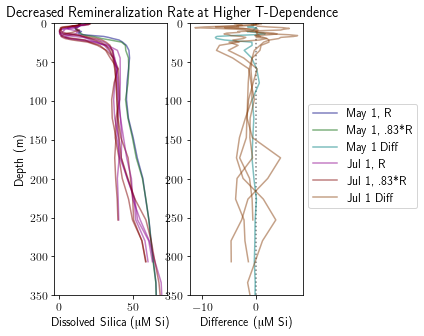

In [6]:
cdirBase='/data/eolson/results/MEOPAR/SS36runs/CedarRuns/'
cdir0='NewLOGnSiTB'
cdir1='NewLOGnSiT'
fp0May=glob.glob(cdirBase+cdir0+'/SalishSea_1h_*_ptrc_T_20170501-20170510.nc')[0]
fp1May=glob.glob(cdirBase+cdir1+'/SalishSea_1h_*_ptrc_T_20170501-20170510.nc')[0]
fp0Jul=glob.glob(cdirBase+cdir0+'/SalishSea_1h_*_ptrc_T_*20170719.nc')[0]
fp1Jul=glob.glob(cdirBase+cdir1+'/SalishSea_1h_*_ptrc_T_*20170719.nc')[0]
fig,ax=plt.subplots(1,2,figsize=(6,5))
fig.subplots_adjust(right=.7)
ax[1].plot((0,0),(0,350),'k:',alpha=.5)
with nc.Dataset(fp0May) as f0May, nc.Dataset(fp1May) as f1May, nc.Dataset(fp0Jul) as f0Jul, nc.Dataset(fp1Jul) as f1Jul:
    for (j,i) in ((457,264),):#((423,264),(423,275),(455,284),(456,264)):
        p0M,=ax[0].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f0May.variables['silicon'][0,:,j,i]),gdept,
                        '-',color='navy',alpha=.5,label='May 1, R')
        p1M,=ax[0].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f1May.variables['silicon'][0,:,j,i]),gdept,
                        '-',color='darkgreen',alpha=.5,label='May 1, .83*R')
        p2M,=ax[1].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f1May.variables['silicon'][0,:,j,i]-f0May.variables['silicon'][0,:,j,i]),
                        gdept,'-',color='teal',alpha=.5, label='May 1 Difference')
    for (j,i) in ((423,264),(423,275),(455,284),(456,264)):
        p0J,=ax[0].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f0Jul.variables['silicon'][-1,:,j,i]),gdept,
                        '-',color='darkmagenta',alpha=.5,label='Jul 27, R')
        p1J,=ax[0].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f1Jul.variables['silicon'][-1,:,j,i]),gdept,
                        '-',color='maroon',alpha=.5,label='Jul 27, .83*R')
        p2J,=ax[1].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f1Jul.variables['silicon'][-1,:,j,i]-f0Jul.variables['silicon'][-1,:,j,i]),
                        gdept,'-',color='saddlebrown',alpha=.5, label='Jul 27 Difference')
fig.legend((p0M,p1M,p2M,p0J,p1J,p2J),('May 1, R','May 1, .83*R','May 1 Diff','Jul 1, R','Jul 1, .83*R','Jul 1 Diff'),loc=5,
           bbox_to_anchor=(.98,0.5,0,0))
ax[0].set_ylim(350,0)
ax[1].set_ylim(350,0)
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel('Dissolved Silica ($\muup$M Si)')
ax[1].set_xlabel('Difference ($\muup$M Si)')
fig.text(.4,.9,'Decreased Remineralization Rate at Higher T-Dependence',ha='center',size=14)
fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsEval/DecreasedReminGn.png',dpi=300,transparent=True)

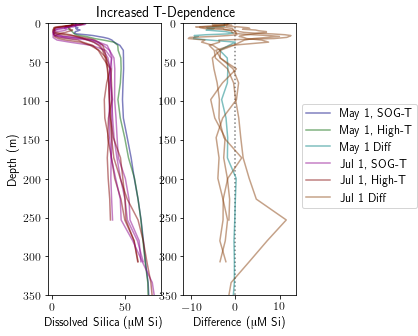

In [7]:
cdirBase='/data/eolson/results/MEOPAR/SS36runs/CedarRuns/'
cdir0='NewLOSOGT'
cdir1='NewLOGnSiT'
fp0May=glob.glob(cdirBase+cdir0+'/SalishSea_1h_*_ptrc_T_20170501-20170510.nc')[0]
fp1May=glob.glob(cdirBase+cdir1+'/SalishSea_1h_*_ptrc_T_20170501-20170510.nc')[0]
fp0Jul=glob.glob(cdirBase+cdir0+'/SalishSea_1h_*_ptrc_T_*20170719.nc')[0]
fp1Jul=glob.glob(cdirBase+cdir1+'/SalishSea_1h_*_ptrc_T_*20170719.nc')[0]
fig,ax=plt.subplots(1,2,figsize=(6,5))
fig.subplots_adjust(right=.7)
ax[1].plot((0,0),(0,350),'k:',alpha=.5)
with nc.Dataset(fp0May) as f0May, nc.Dataset(fp1May) as f1May, nc.Dataset(fp0Jul) as f0Jul, nc.Dataset(fp1Jul) as f1Jul:
    for (j,i) in ((457,264),):#((423,264),(423,275),(455,284),(456,264)):
        p0M,=ax[0].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f0May.variables['silicon'][0,:,j,i]),gdept,
                        '-',color='navy',alpha=.5,label='May 1, R')
        p1M,=ax[0].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f1May.variables['silicon'][0,:,j,i]),gdept,
                        '-',color='darkgreen',alpha=.5,label='May 1, .83*R')
        p2M,=ax[1].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f1May.variables['silicon'][0,:,j,i]-f0May.variables['silicon'][0,:,j,i]),
                        gdept,'-',color='teal',alpha=.5, label='May 1 Difference')
    for (j,i) in ((423,264),(423,275),(455,284),(456,264)):
        p0J,=ax[0].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f0Jul.variables['silicon'][-1,:,j,i]),gdept,
                        '-',color='darkmagenta',alpha=.5,label='Jul 27, R')
        p1J,=ax[0].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f1Jul.variables['silicon'][-1,:,j,i]),gdept,
                        '-',color='maroon',alpha=.5,label='Jul 27, .83*R')
        p2J,=ax[1].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f1Jul.variables['silicon'][-1,:,j,i]-f0Jul.variables['silicon'][-1,:,j,i]),
                        gdept,'-',color='saddlebrown',alpha=.5, label='Jul 27 Difference')
fig.legend((p0M,p1M,p2M,p0J,p1J,p2J),('May 1, SOG-T','May 1, High-T','May 1 Diff','Jul 1, SOG-T','Jul 1, High-T','Jul 1 Diff'),loc=5,
           bbox_to_anchor=(.98,0.5,0,0))
ax[0].set_ylim(350,0)
ax[1].set_ylim(350,0)
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel('Dissolved Silica ($\muup$M Si)')
ax[1].set_xlabel('Difference ($\muup$M Si)')
fig.text(.4,.9,'Increased T-Dependence',ha='center',size=14)
fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsEval/IncreasedTDep.png',dpi=300,transparent=True)

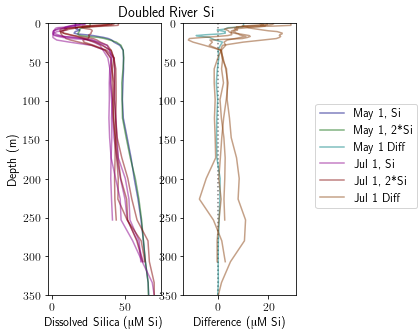

In [8]:
cdirBase='/data/eolson/results/MEOPAR/SS36runs/CedarRuns/'
cdir0='NewLOSOGT'
cdir1='NewLOSOGT2Si'
fp0May=glob.glob(cdirBase+cdir0+'/SalishSea_1h_*_ptrc_T_20170501-20170510.nc')[0]
fp1May=glob.glob(cdirBase+cdir1+'/SalishSea_1h_*_ptrc_T_20170501-20170510.nc')[0]
fp0Jul=glob.glob(cdirBase+cdir0+'/SalishSea_1h_*_ptrc_T_*20170719.nc')[0]
fp1Jul=glob.glob(cdirBase+cdir1+'/SalishSea_1h_*_ptrc_T_*20170719.nc')[0]
fig,ax=plt.subplots(1,2,figsize=(6,5))
fig.subplots_adjust(right=.7)
ax[1].plot((0,0),(0,350),'k:',alpha=.5)
with nc.Dataset(fp0May) as f0May, nc.Dataset(fp1May) as f1May, nc.Dataset(fp0Jul) as f0Jul, nc.Dataset(fp1Jul) as f1Jul:
    for (j,i) in ((457,264),):#((423,264),(423,275),(455,284),(456,264)):
        p0M,=ax[0].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f0May.variables['silicon'][0,:,j,i]),gdept,
                        '-',color='navy',alpha=.5,label='May 1, Si')
        p1M,=ax[0].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f1May.variables['silicon'][0,:,j,i]),gdept,
                        '-',color='darkgreen',alpha=.5,label='May 1, 2*Si')
        p2M,=ax[1].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f1May.variables['silicon'][0,:,j,i]-f0May.variables['silicon'][0,:,j,i]),
                        gdept,'-',color='teal',alpha=.5, label='May 1 Difference')
    for (j,i) in ((423,264),(423,275),(455,284),(456,264)):
        p0J,=ax[0].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f0Jul.variables['silicon'][-1,:,j,i]),gdept,
                        '-',color='darkmagenta',alpha=.5,label='Jul 27, Si')
        p1J,=ax[0].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f1Jul.variables['silicon'][-1,:,j,i]),gdept,
                        '-',color='maroon',alpha=.5,label='Jul 27, 2*Si')
        p2J,=ax[1].plot(np.ma.masked_where(tmask[0,:,j,i]==0,f1Jul.variables['silicon'][-1,:,j,i]-f0Jul.variables['silicon'][-1,:,j,i]),
                        gdept,'-',color='saddlebrown',alpha=.5, label='Jul 27 Difference')
fig.legend((p0M,p1M,p2M,p0J,p1J,p2J),('May 1, Si','May 1, 2*Si','May 1 Diff','Jul 1, Si','Jul 1, 2*Si','Jul 1 Diff'),loc=5,
           bbox_to_anchor=(.98,0.5,0,0))
ax[0].set_ylim(350,0)
ax[1].set_ylim(350,0)
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel('Dissolved Silica ($\muup$M Si)')
ax[1].set_xlabel('Difference ($\muup$M Si)')
fig.text(.4,.9,'Doubled River Si',ha='center',size=14)
fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsEval/River2xSi.png',dpi=300,transparent=True)